<a href="https://colab.research.google.com/github/seoljincheol/Machine-Learning/blob/main/%ED%98%BC%EC%9E%90_%EA%B3%B5%EB%B6%80%ED%95%98%EB%8A%94_%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D(8%EC%9E%A5).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 8. 이미지를 위한 인공신경망

### 8-1. 합성곱 신경망의 구성요소

CNN (Convolution Neural Network)
* 합성곱 신경망: 뉴런 = 필터(뉴런 수) = 커널(입력에 곱하는 가중치)
* 패딩: 입력 배열 주위에 가상의 원소(0)를 채우는 것. 측면 특성이 전달되지 않는 현상 방지
* 스트라이딩: 이동의 크기
* 풀링: 합성곱 층에서 만든 특성 맵의 가로,세로 크기를 줄임. (2,2)풀링으로 입력을 절반으로 줄임. (2,2,3) -> (1,1,3). 가중치가 없는 대신 max/average값 계산

In [ ]:
from tensorflow import keras
keras.layers.conv2D(10, kernel_size=(3,3), activation='relu') 
# 필터의 개수, 커널의 크기(3,3, or 5,5 추천), 활성화 함수

In [ ]:
keras.layers.conv2D(10, kernel_size=(3,3), activation='relu', padding='same', strides=1)
keras.layers.MaxPooling2D(2, strides=2, padding='valid')

### 8-2. 합성곱 신경망을 사용한 이미지 분류

In [ ]:
from tensorflow import keras
from sklearn.model_selection import train_test_split

(train_input, train_target), (test_input, test_target) =  keras.datasets.fashion_mnist.load_data()

train_scaled = train_input.reshape(-1, 28, 28, 1) / 255.0

train_scaled, val_scaled, train_target, val_target = train_test_split(
    train_scaled, train_target, test_size=0.2, random_state=42)

4423680/4422102 [==============================] - 0s 0us/step


In [ ]:
print(train_scaled.shape, val_scaled.shape)
print(train_target.shape, val_target.shape)
print(test_input.shape, test_target.shape)

(48000, 28, 28, 1) (12000, 28, 28, 1)
(48000,) (12000,)
(10000, 28, 28) (10000,)


In [ ]:
model = keras.Sequential()
model.add(keras.layers.Conv2D(32, kernel_size=3, activation='relu', padding='same', input_shape=(28,28,1)))
model.add(keras.layers.MaxPooling2D(2))
model.add(keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu', padding='same'))
model.add(keras.layers.MaxPooling2D(2))

model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dropout(0.4))
model.add(keras.layers.Dense(10, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 3136)              0         
_________________________________________________________________
dense (Dense)                (None, 100)               313700    
_________________________________________________________________
dropout (Dropout)            (None, 100)               0

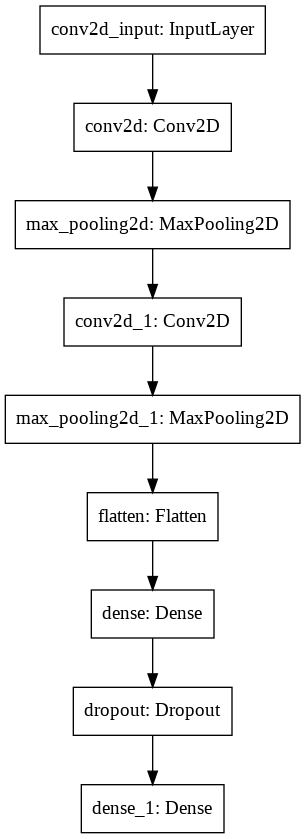

In [ ]:
keras.utils.plot_model(model)

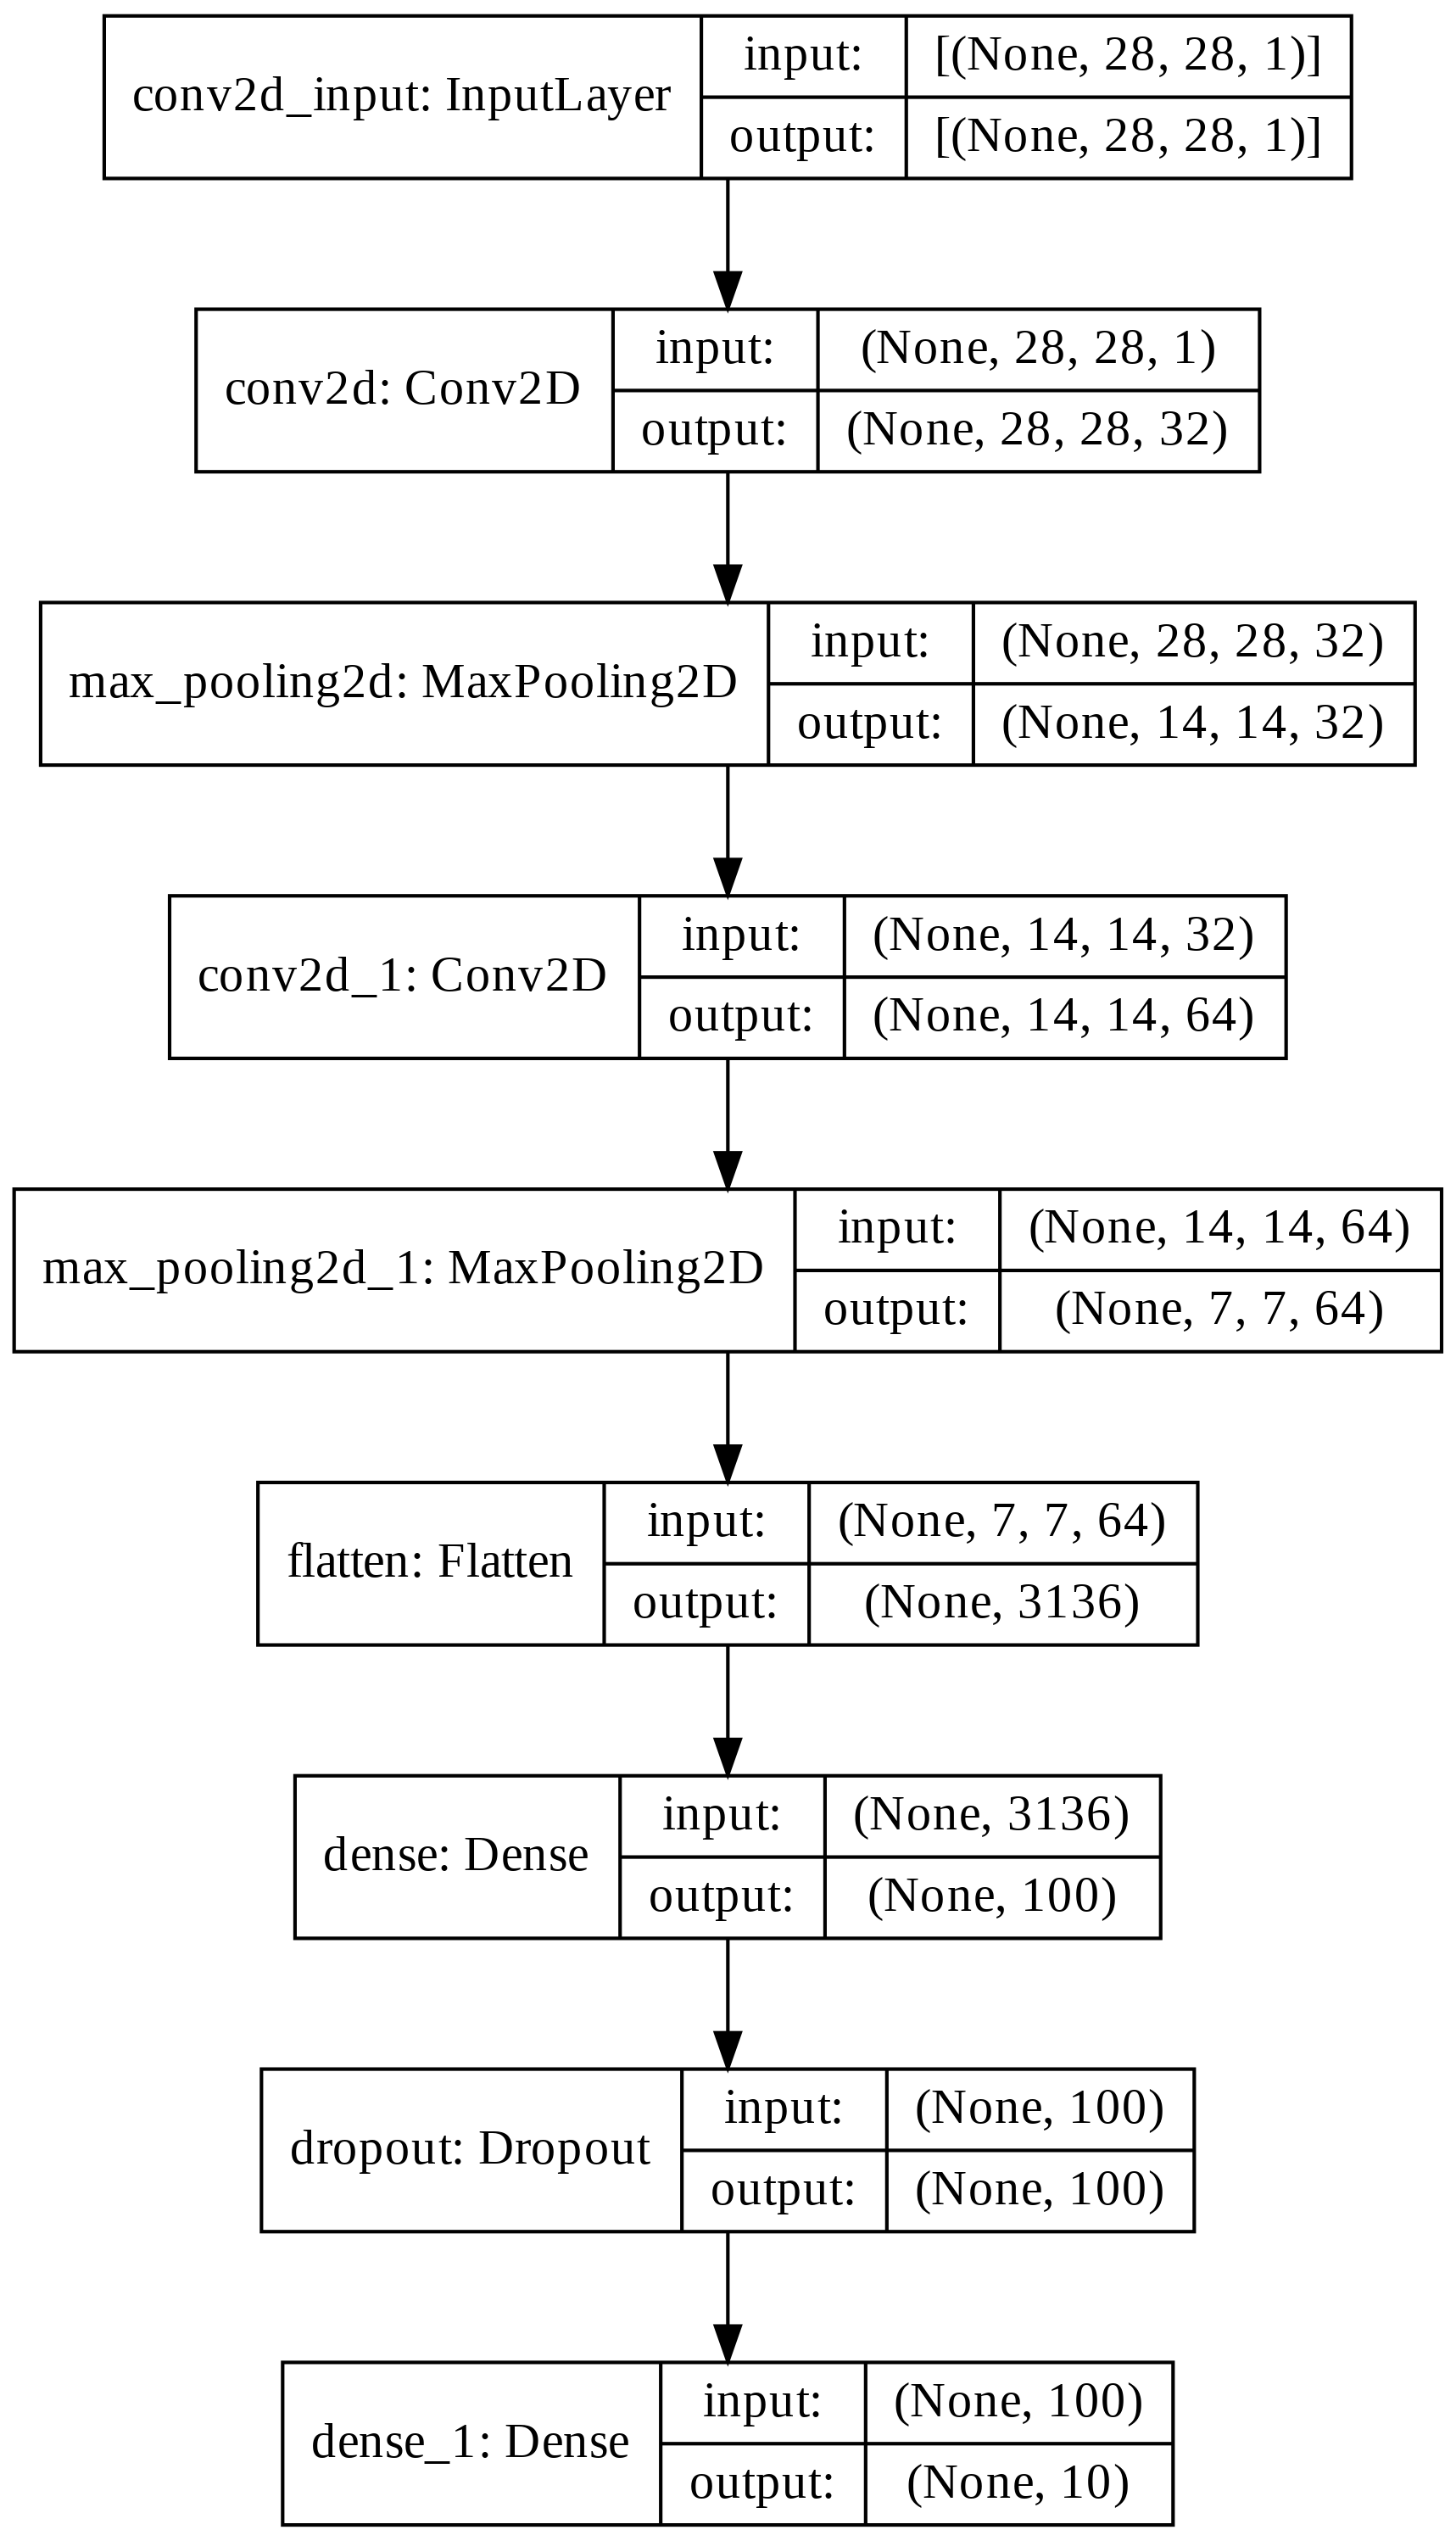

In [ ]:
keras.utils.plot_model(model, show_shapes=True, to_file='cnn-architecture.png', dpi=300)

모델 컴파일과 훈련

In [ ]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-cnn-model.h5')
early_stopping_cb = keras.callbacks.EarlyStopping(patience=2, restore_best_weights=True)
history = model.fit(train_scaled, train_target, epochs=20,
                    validation_data=(val_scaled, val_target),
                    callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/20
1500/1500 [==============================] - 55s 37ms/step - loss: 0.7233 - accuracy: 0.7375 - val_loss: 0.3309 - val_accuracy: 0.8768
Epoch 2/20
1500/1500 [==============================] - 54s 36ms/step - loss: 0.3591 - accuracy: 0.8727 - val_loss: 0.2745 - val_accuracy: 0.8965
Epoch 3/20
1500/1500 [==============================] - 53s 36ms/step - loss: 0.3004 - accuracy: 0.8928 - val_loss: 0.2558 - val_accuracy: 0.9095
Epoch 4/20
1500/1500 [==============================] - 53s 35ms/step - loss: 0.2635 - accuracy: 0.9059 - val_loss: 0.2443 - val_accuracy: 0.9072
Epoch 5/20
1500/1500 [==============================] - 53s 35ms/step - loss: 0.2406 - accuracy: 0.9144 - val_loss: 0.2248 - val_accuracy: 0.9172
Epoch 6/20
1500/1500 [==============================] - 53s 35ms/step - loss: 0.2159 - accuracy: 0.9218 - val_loss: 0.2272 - val_accuracy: 0.9175
Epoch 7/20
1500/1500 [==============================] - 53s 35ms/step - loss: 0.2000 - accuracy: 0.9268 - val_loss: 0.2289 -

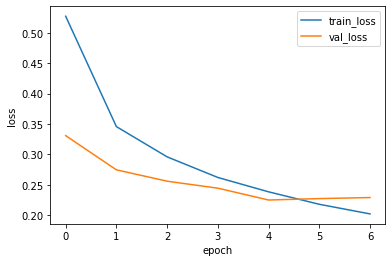

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train_loss','val_loss'])
plt.show()

In [ ]:
# 성능 평가
model.evaluate(val_scaled, val_target)

375/375 [==============================] - 4s 11ms/step - loss: 0.2248 - accuracy: 0.9172


[0.22483034431934357, 0.9171666502952576]

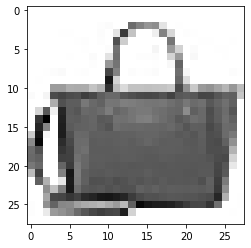

In [ ]:
plt.imshow(val_scaled[0].reshape(28,28), cmap='gray_r')
plt.show()

In [ ]:
preds = model.predict(val_scaled[0:1])
print(preds)

# keras의 

[[5.0940507e-14 1.5417250e-18 9.2456674e-16 6.1586868e-15 1.1573690e-14
  8.3458058e-12 3.5653077e-14 1.1728284e-11 1.0000000e+00 4.0333955e-13]]


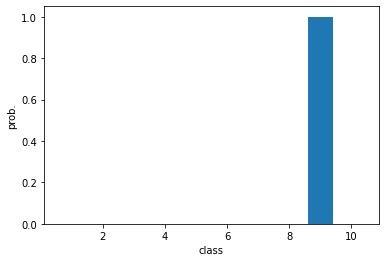

In [ ]:
plt.bar(range(1,11), preds[0])
plt.xlabel('class')
plt.ylabel('prob.')
plt.show()

In [ ]:
classes = ['티셔츠','바지','스웨터','드레스','코트','샌달','셔츠','스니커즈','가방','앵클부츠']

In [ ]:
import numpy as np
print(classes[np.argmax(preds)])

가방


In [ ]:
# 픽셀의 범위를 0~1, 이미지 크기를 (28,28) -> (28,28,1)
test_scaled = test_input.reshape(-1, 28, 28, 1) / 255.0

In [ ]:
# 테스트 세트 성능측정
model.evaluate(test_scaled, test_target)

313/313 [==============================] - 4s 11ms/step - loss: 0.2497 - accuracy: 0.9117


[0.2497054636478424, 0.9117000102996826]

### 8-3. 합성곱 신경망의 시각화

가중치 시각화

In [ ]:
from tensorflow import keras
model = keras.models.load_model('best-cnn-model.h5')
model.layers

In [ ]:
# 합성곱 층의 가중치, 절편
conv = model.layers[0]
print(conv.weights[0].shape, conv.weights[1].shape) 
'''
커널(3,3), 깊이(1), 필터(32) => 가중치: (3,3,1,32)
필터마다 절편이 1개씩 => 절편: (32,)
'''

# 가중치 배열의 평균과 표준편차
conv_weights = conv.weights[0].numpy()
print(conv_weights.mean(), conv_weights.std())

(3, 3, 1, 32) (32,)
-0.028013965 0.24434566


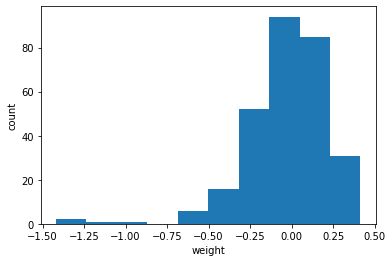

In [ ]:
import matplotlib.pyplot as plt
plt.hist(conv_weights.reshape(-1,1))
plt.xlabel('weight')
plt.ylabel('count')
plt.show()

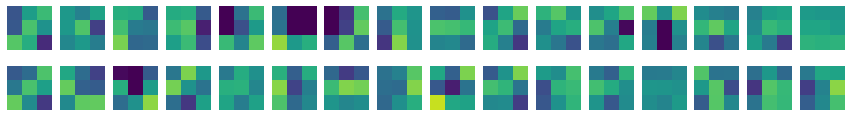

In [ ]:
# conv_weights 범위는 32개 [:,:,:0,0]~[:,:,:0,31]
# vmin, vmax 로 컬러맵 표현범위 지정
# imshow() 함수는 배열 내부의 최대값과 최소값으로 픽셀의 강도 표현함

fig, axs = plt.subplots(2, 16, figsize=(15,2))
for i in range(2):
    for j in range(16):
        axs[i,j].imshow(conv_weights[:,:,0,i*16 + j], vmin=-0.5, vmax=0.5) 
        axs[i,j].axis('off')
plt.show()

In [ ]:
# 훈련하지 않은 신경망
no_training_model = keras.Sequential()
no_training_model.add(keras.layers.Conv2D(32, kernel_size=3, activation='relu', padding='same', input_shape=(28,28,1)))

# 첫번째층(Conv2D) 가중치 저장
no_training_conv = no_training_model.layers[0]
print(no_training_conv.weights[0].shape)

# 가중치 배열의 평균과 표준편차
no_training_weights = no_training_conv.weights[0].numpy()
print(no_training_weights.mean(), no_training_weights.std())

(3, 3, 1, 32)
-5.2851727e-05 0.08191437


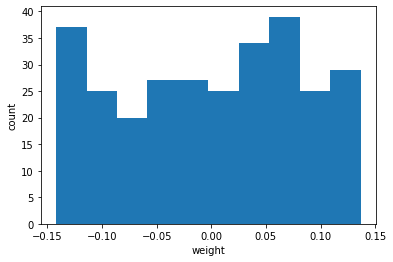

In [ ]:
plt.hist(no_training_weights.reshape(-1,1))
plt.xlabel('weight')
plt.ylabel('count')
plt.show()
# 고른 분포를 보임: 신경망 가중치 초기화시 균등분포에서 랜덤선택

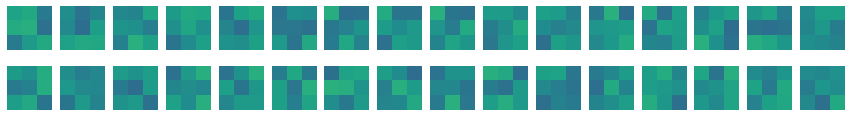

In [ ]:
fig, axs = plt.subplots(2, 16, figsize=(15,2))
for i in range(2):
    for j in range(16):
        axs[i,j].imshow(no_training_weights[:,:,0,i*16 + j], vmin=-0.5, vmax=0.5) 
        axs[i,j].axis('off')
plt.show()

함수형 API
* 입력, 출력이 2개 이상일 경우 Sequential 클래스 사용이 어려움.
* 함수처럼 만들어 사용하는 합성곱 신경망
>* dense1 = keras.layers.Dense(100, activation='sigmoid')
>* dense2 = keras.layers.Dense(10, activation='softmax')
> * inputs = keras.Input(shape=(784,))
> * hidden = dense1(inputs)
> * outputs = dense2(hidden)
> * model = Model(inputs, outputs)


In [ ]:
model.layers

In [ ]:
print(model.input)

KerasTensor(type_spec=TensorSpec(shape=(None, 28, 28, 1), dtype=tf.float32, name='conv2d_input'), name='conv2d_input', description="created by layer 'conv2d_input'")


In [ ]:
print(model.layers[0].output)
'''
# Sequential 클래스에서 InputLayer 객체는 _layers[0]
# InputLayer 클래스는 신경망의 입력층 역할. 모델의 입력을 첫 번째 은닉층에 전달하는 역할.
# InputLayer 객체의 입력과 출력은 동일함. 
# model._layers[0].input = model._layers[0].output
'''

KerasTensor(type_spec=TensorSpec(shape=(None, 28, 28, 32), dtype=tf.float32, name=None), name='conv2d/Relu:0', description="created by layer 'conv2d'")


In [ ]:
# 첫번째층(Conv2D) 입력과 출력 모델 생성
conv_acti = keras.models.Model(model.input, model.layers[0].output)

특성맵 시각화
* 합성곱 신경망의 앞부분은 이미지의 시각적 정보 탐지, 뒷부분은 앞의 정보를 받아서 추상적인 정보를 학습

In [ ]:
(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()

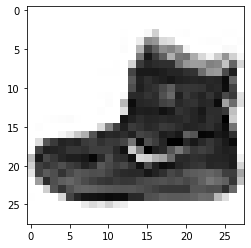

In [ ]:
plt.imshow(train_input[0], cmap='Greys')
plt.show()

In [ ]:
# 샘플을 conv_acti 모델에 넣어서 특성맵 출력하기
inputs = train_input[0:1].reshape(-1,28,28,1) / 255.0
feature_maps = conv_acti.predict(inputs)
print(feature_maps.shape)

(1, 28, 28, 32)


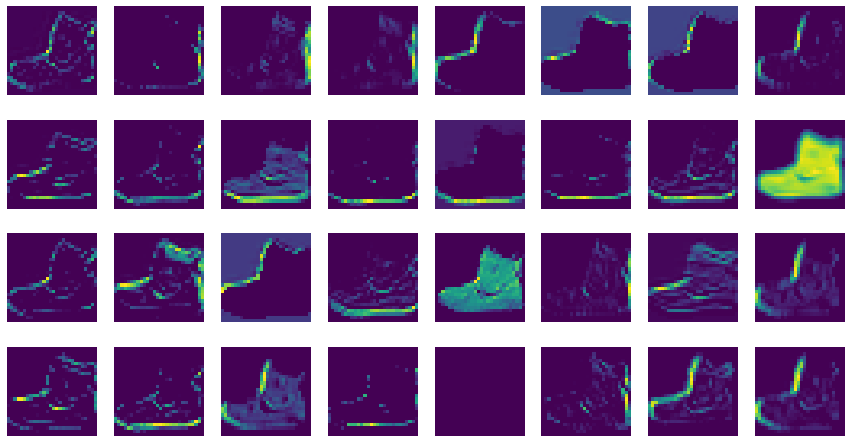

In [ ]:
fig, axs = plt.subplots(4, 8, figsize=(15,8))
for i in range(4):
    for j in range(8):
        axs[i,j].imshow(feature_maps[0,:,:,i*8 + j])
        axs[i,j].axis('off')
plt.show()

In [ ]:
# 두번째층(Conv2D) 입력과 출력 모델 생성
conv2_acti = keras.models.Model(model.input, model.layers[2].output)
inputs = train_input[0:1].reshape(-1,28,28,1) / 255.0
feature_maps = conv2_acti.predict(inputs)
print(feature_maps.shape)

(1, 14, 14, 64)


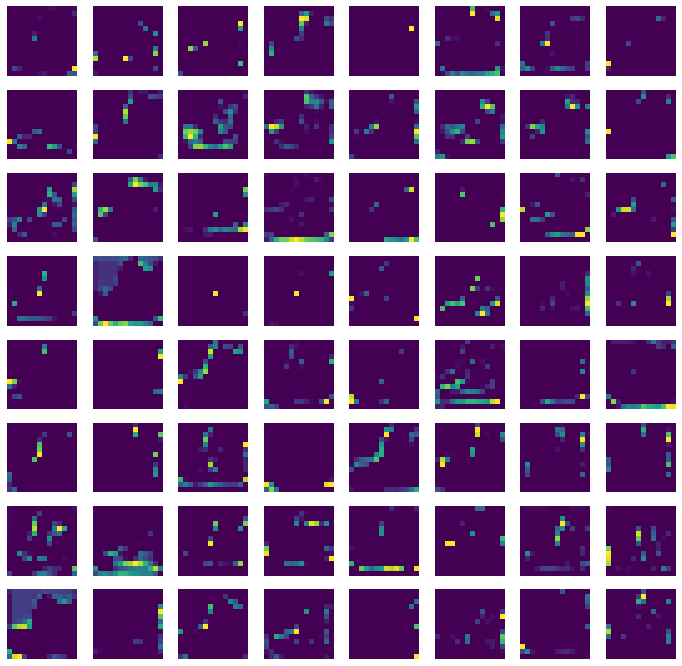

In [ ]:
fig, axs = plt.subplots(8, 8, figsize=(12,12))
for i in range(8):
    for j in range(8):
        axs[i,j].imshow(feature_maps[0,:,:,i*8 + j])
        axs[i,j].axis('off')
plt.show()